### LinearRegression 클래스 - Ordinary Least Squares 

* CRIM : 지역별 범죄 발생률
* ZN : 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우 1, 아니면 0)
* NOX : 일산화질소 농도
* RM : 거주할 주거의 방 개수 
* AGE : 건축된 소유 주택의 연식, 1940년 이전에 건축된 소유주택 
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러당 책정된 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유 주택 가격에서의 중앙값(Median)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
## boston datasets 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

## boston_df의 y값을 생성
boston_df['PRICE'] = boston.target

print('boston_df의 shape:', boston_df.shape)
boston_df.head(4)

boston_df의 shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [19]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

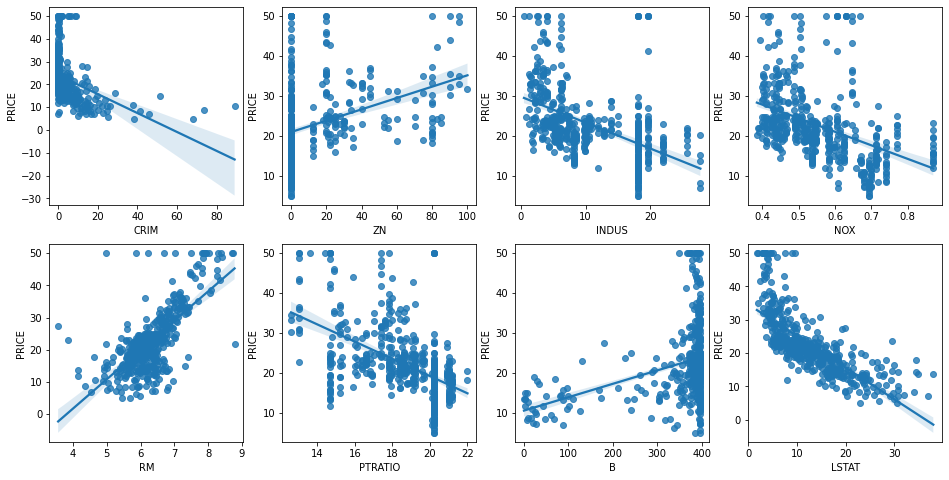

In [53]:
### 선형성을 보기 위한 plot 그리기

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_ftrs=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'B', 'LSTAT']
len(lm_ftrs)

for i, ftr in enumerate(lm_ftrs):
    row = int(i/4) # 몫을 int로 가져오게 함
    col = i%4 # 나머지를 가져오게 함
    sns.regplot(x=ftr, y='PRICE', data=boston_df, ax=axs[row,col])

# ### NGD(노가다)기법
# # 0번째 행
# sns.regplot(x='CRIM', y='PRICE', data=boston_df, ax=axs[0][0])
# sns.regplot(x='ZN', y='PRICE', data=boston_df, ax=axs[0][1])
# sns.regplot(x='INDUS', y='PRICE', data=boston_df, ax=axs[0][2])
# sns.regplot(x='NOX', y='PRICE', data=boston_df, ax=axs[0][3])

# # 1번째 행
# sns.regplot(x='RM', y='PRICE', data=boston_df, ax=axs[1][0])
# sns.regplot(x='PTRATIO', y='PRICE', data=boston_df, ax=axs[1][1])
# sns.regplot(x='B', y='PRICE', data=boston_df, ax=axs[1][2])
# sns.regplot(x='LSTAT', y='PRICE', data=boston_df, ax=axs[1][3])

In [59]:
### 간단하게 선형회귀 분석을 수행해본다.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_data = boston_df.drop(['PRICE'], axis=1)
y_target = boston_df['PRICE']

print(X_data.shape)
print(y_target.shape)

# train_test_spit을 수행할 예정 :: test_size = 0.3, random_state =156
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                   test_size= 0.3,
                                                   random_state=156)

(506, 13)
(506,)


In [63]:
### train, test의 shape을 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## 선형회귀 모델로 fit/pred/eval

lr = LinearRegression()
lr.fit(X_train, y_train) # fitting을 시킴

preds_lr = lr.predict(X_test)

## 지표를 생성 및 적용
mse = mean_squared_error(y_test,preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,preds_lr)

r2_1 = r2_score(y_test, preds_lr)

print('MSE:{0:.4f}, RMSE:{1:.4f}, MAE:{2:.4f}'.format(mse, rmse, mae))

(354, 13)
(152, 13)
(354,)
(152,)
MSE:17.2969, RMSE:4.1590, MAE:3.2137


In [67]:
boston_df.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [70]:
# y = w1 * x1 + w2 * x2 + b ... 
# intercept(절편)과 coefficient(계수)값

print('절편 값:', np.round(lr.intercept_,4))
print('회귀계수값:', np.round(lr.coef_,4))

# 회귀계수를 소수점 2째자리까지 맞춰줌
coef_1 = np.round(lr.coef_,2)

절편 값: 40.9956
회귀계수값: [-1.13000e-01  6.55000e-02  3.44000e-02  3.04590e+00 -1.97958e+01
  3.35500e+00  5.90000e-03 -1.74190e+00  3.55900e-01 -1.43000e-02
 -9.20200e-01  1.04000e-02 -5.66200e-01]


In [74]:
# 회귀계수 정렬
coef_sr = pd.Series(data=coef_1, index= X_data.columns)
coef_sr.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

In [77]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)
lr_reg = LinearRegression()

# cross_val_score()로 fold 5개로 set
# MSE를 구한뒤
# 이를 기반으로 RMSE

# neg_mse_scores는 mean_squared_error에 -1이 곱해진 상태
neg_mse_scores = cross_val_score(lr_reg, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# Negative MSE scores는 전부 다 음수
print('5 folds의 개별 Neg MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE scores:', np.round(avg_rmse,2))

5 folds의 개별 Neg MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


## 다항 회귀를 통한 under-fitting and over-fitting

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline # 첫 출
from sklearn.preprocessing import PolynomialFeatures # 다항회귀 :: 곡선결과
from sklearn.linear_model import LinearRegression # 단순선형회귀
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.metrics import SCORERS


In [79]:
# 임의의 값으로 구성된 X값에 대해
# 코사인 변환 값을 반환.

def true_func(X):
    return np.cos(1.5 * np.pi * X)

In [94]:
# X는 0~ 1까지의 30개의 임의의 값을
# 샘플링을 해보자.
np.random.seed(0)
n_samples=30 
X = np.sort(np.random.rand(n_samples))
X

# y값은 코사인 기반의 true_func
# 약간의 노이즈 변동을 더해서

y = true_func(X) + np.random.randn(n_samples) * 0.1
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])


Degree 1 회귀 계수는 [-1.61]입니다.

Degree 1 MSE는 0.40772896250986834입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.

Degree 4 MSE는 0.04320874987231747입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]입니다.

Degree 15 MSE는 182815433.47648773입니다.


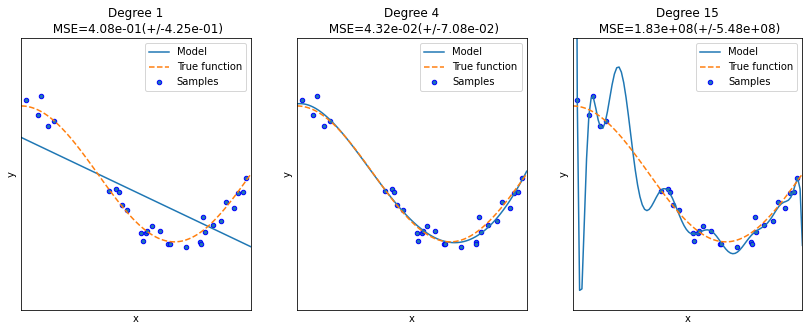

In [120]:
# 다항식 차수를 각각 1, 4, 15로 변경해서 결과를 비교하기
plt.figure(figsize=(14,5))
degree = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각
# 변화시키며 변화를 비교
for i in range(len(degree)):
    ax = plt.subplot(1,len(degree), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    ### 개별 degree 별로 Polynomial(다항식) 변환
    polynomial_features  = PolynomialFeatures(degree= degree[i], include_bias= False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("poly_ftrs", polynomial_features),
                         ("linear_reg", linear_regression)])
    X_train = X.reshape(-1,1)    
    
    # pipeline의 학습
    pipeline.fit(X_train, y) # X값을 2차원으로 만든다. 
    
    # 교차검증으로 다항회귀를 평가 
    scores = cross_val_score(pipeline, X_train, y, scoring='neg_mean_squared_error', cv=10)
    
    # pipeline을 구성하는 세부 객체를 named_steps['객체명']을 활용해
    # 회귀계수를 도출
    coefficients = pipeline.named_steps['linear_reg'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degree[i], np.round(coefficients,2)))
    print('\nDegree {0} MSE는 {1}입니다.'.format(degree[i], -1*np.mean(scores)))
    
     # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행 및 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolors='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title("Degree {}\n MSE={:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [121]:
# end of files